# Applied Computational Intelligence - HW2

Authors
- Brewton Morais
- Lucas Abdalah

In [3]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from scipy.stats import zscore
import seaborn as sns
from matplotlib.cbook import boxplot_stats
from math import sqrt
from pyexpat import model
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.decomposition import PCA

# Solubility data divided into train and test sets
solX_test = pd.read_csv(r"https://raw.githubusercontent.com/lucasabdalah/Exploratory-Data-Analisys/hw2-newcode/code/hw2/solTestX.csv")
solX_train = pd.read_csv(r"https://raw.githubusercontent.com/lucasabdalah/Exploratory-Data-Analisys/hw2-newcode/code/hw2/solTrainX.csv")
solY_train = pd.read_csv(r"https://raw.githubusercontent.com/lucasabdalah/Exploratory-Data-Analisys/hw2-newcode/code/hw2/solTrainY.csv")
solY_test = pd.read_csv(r"https://raw.githubusercontent.com/lucasabdalah/Exploratory-Data-Analisys/hw2-newcode/code/hw2/solTestY.csv")

In [4]:
# concatenate data
X= pd.concat([solX_train, solX_test], axis=0)
Y = pd.concat([solY_train, solY_test], axis = 0)

# Target: solubility of chemical compound
data = pd.concat([X, Y], axis = 1)
data = data.rename(columns={'x':'solubility'})
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FP001,1267.0,0.486977,0.500028,0.000,0.0000,0.000,1.000,1.000
FP002,1267.0,0.550908,0.497598,0.000,0.0000,1.000,1.000,1.000
FP003,1267.0,0.438043,0.496342,0.000,0.0000,0.000,1.000,1.000
FP004,1267.0,0.571429,0.495067,0.000,0.0000,1.000,1.000,1.000
FP005,1267.0,0.588792,0.492247,0.000,0.0000,1.000,1.000,1.000
...,...,...,...,...,...,...,...,...
NumRings,1267.0,1.400947,1.281266,0.000,0.0000,1.000,2.000,7.000
HydrophilicFactor,1267.0,-0.040946,1.092327,-0.986,-0.7665,-0.338,0.312,13.483
SurfaceArea1,1267.0,35.537238,34.409726,0.000,9.2300,27.690,52.320,331.940
SurfaceArea2,1267.0,38.939013,37.047585,0.000,9.2300,32.260,57.200,331.940


In [5]:
print("N = {} Observations\n".format(len(data.axes[0])))
print("D = {} Predictor variables\n".format(len(data.columns)))
print("Predictor Names:\n{}\n".format(data.columns.to_list()))
print("Class-Counts:\n{}".format(data["solubility"].value_counts()))

N = 1267 Observations

D = 229 Predictor variables

Predictor Names:
['FP001', 'FP002', 'FP003', 'FP004', 'FP005', 'FP006', 'FP007', 'FP008', 'FP009', 'FP010', 'FP011', 'FP012', 'FP013', 'FP014', 'FP015', 'FP016', 'FP017', 'FP018', 'FP019', 'FP020', 'FP021', 'FP022', 'FP023', 'FP024', 'FP025', 'FP026', 'FP027', 'FP028', 'FP029', 'FP030', 'FP031', 'FP032', 'FP033', 'FP034', 'FP035', 'FP036', 'FP037', 'FP038', 'FP039', 'FP040', 'FP041', 'FP042', 'FP043', 'FP044', 'FP045', 'FP046', 'FP047', 'FP048', 'FP049', 'FP050', 'FP051', 'FP052', 'FP053', 'FP054', 'FP055', 'FP056', 'FP057', 'FP058', 'FP059', 'FP060', 'FP061', 'FP062', 'FP063', 'FP064', 'FP065', 'FP066', 'FP067', 'FP068', 'FP069', 'FP070', 'FP071', 'FP072', 'FP073', 'FP074', 'FP075', 'FP076', 'FP077', 'FP078', 'FP079', 'FP080', 'FP081', 'FP082', 'FP083', 'FP084', 'FP085', 'FP086', 'FP087', 'FP088', 'FP089', 'FP090', 'FP091', 'FP092', 'FP093', 'FP094', 'FP095', 'FP096', 'FP097', 'FP098', 'FP099', 'FP100', 'FP101', 'FP102', 'FP103', 'FP

In [6]:
data_slice = data.iloc[:, 208:229]
data_slice

,MolWeight,NumAtoms,NumNonHAtoms,NumBonds,NumNonHBonds,NumMultBonds,NumRotBonds,NumDblBonds,NumAromaticBonds,NumHydrogen,...,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2,solubility
0,208.28,28,16,30,18,16,0,0,16,12,...,2,0,0,0,0,3,-0.856,25.78,25.78,-3.97
1,365.54,49,26,52,29,13,4,0,12,23,...,3,1,1,0,0,4,-0.370,52.19,80.43,-3.98
2,206.31,33,15,33,15,7,4,1,6,18,...,0,2,0,0,0,1,-0.330,37.30,37.30,-3.99
3,136.26,26,10,26,10,2,1,2,0,16,...,0,0,0,0,0,1,-0.960,0.00,0.00,-4.00
4,229.75,31,15,31,15,6,5,0,6,16,...,5,0,0,1,1,1,-0.069,53.94,53.94,-4.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,326.42,22,17,23,18,12,1,0,12,5,...,0,0,0,5,5,2,-0.692,0.00,0.00,-7.89
312,165.21,23,12,23,12,7,3,1,6,11,...,1,2,0,0,0,1,0.590,52.32,52.32,-2.32
313,188.25,26,14,27,15,8,1,2,6,12,...,2,1,0,0,0,2,-0.766,26.93,26.93,0.39
314,318.34,38,24,41,27,19,2,1,18,14,...,0,4,0,0,0,4,0.214,66.76,66.76,-2.90


In [7]:
df = data_slice.apply(zscore)
df.head(2)

,MolWeight,NumAtoms,NumNonHAtoms,NumBonds,NumNonHBonds,NumMultBonds,NumRotBonds,NumDblBonds,NumAromaticBonds,NumHydrogen,...,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2,solubility
0,0.088597,0.218621,0.463018,0.325003,0.612634,1.905518,-0.906804,-0.812956,2.056022,-0.032277,...,1.036222,-0.910073,-0.322565,-0.3975,-0.475069,1.248519,-0.746458,-0.283672,-0.355332,-0.599951
1,1.726653,1.907605,2.031166,1.981154,2.093174,1.322825,0.760110,-0.812956,1.295222,1.482366,...,1.890414,-0.314483,1.851319,-0.3975,-0.475069,2.029305,-0.301361,0.484146,1.120380,-0.604821


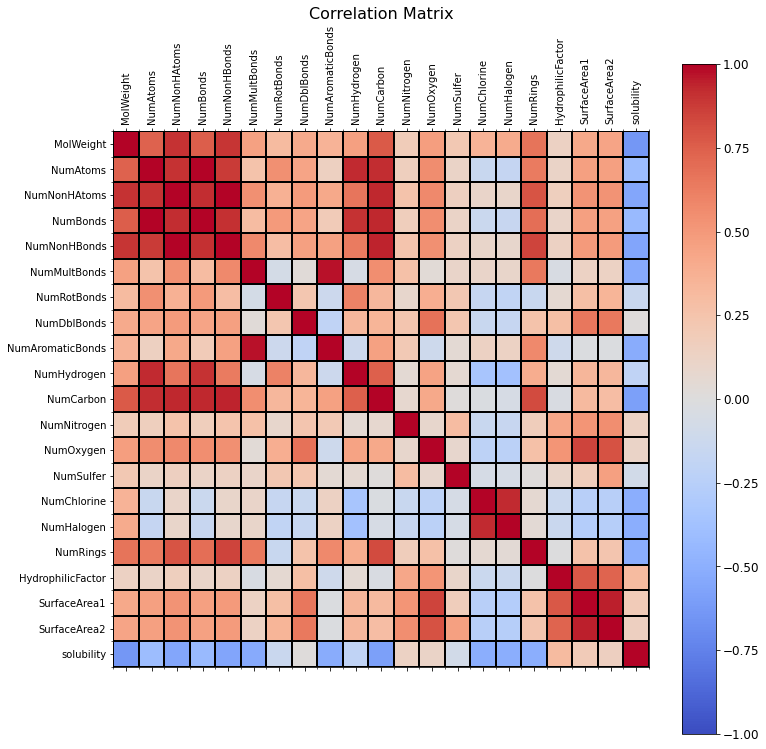

In [8]:
fig1 = plt.figure(figsize=(12, 12))
plt.matshow(df.corr(), fignum=fig1.number, cmap="coolwarm", interpolation='none')
plt.xticks(range(len(df.columns)),df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
cb = plt.colorbar()
plt.clim(-1,1)
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=16)

# Gridlines based on minor ticks
ax = plt.gca()
ax.set_xticks(np.arange(-.5, len(df.columns), 1), minor=True)
ax.set_yticks(np.arange(-.5, len(df.columns), 1), minor=True)
ax.grid(which='minor', color='k', linestyle='-', linewidth=2)
plt.show()

c:\Users\brewt\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


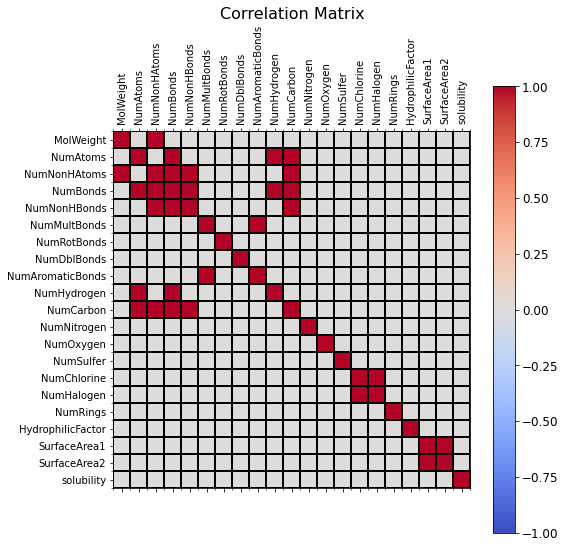

In [9]:
fig2 = plt.figure(figsize=(8, 8))
thre = 0.9
plt.matshow((df.corr() > thre) + (df.corr() < -thre), fignum=fig2.number, cmap="coolwarm")
plt.xticks(range(len(df.columns)),df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
cb = plt.colorbar()
plt.clim(-1,1)
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=16)

# Gridlines based on minor ticks
ax = plt.gca()
ax.set_xticks(np.arange(-.5, len(df.columns), 1), minor=True)
ax.set_yticks(np.arange(-.5, len(df.columns), 1), minor=True)
ax.grid(which='minor', color='k', linestyle='-', linewidth=2)
plt.show()

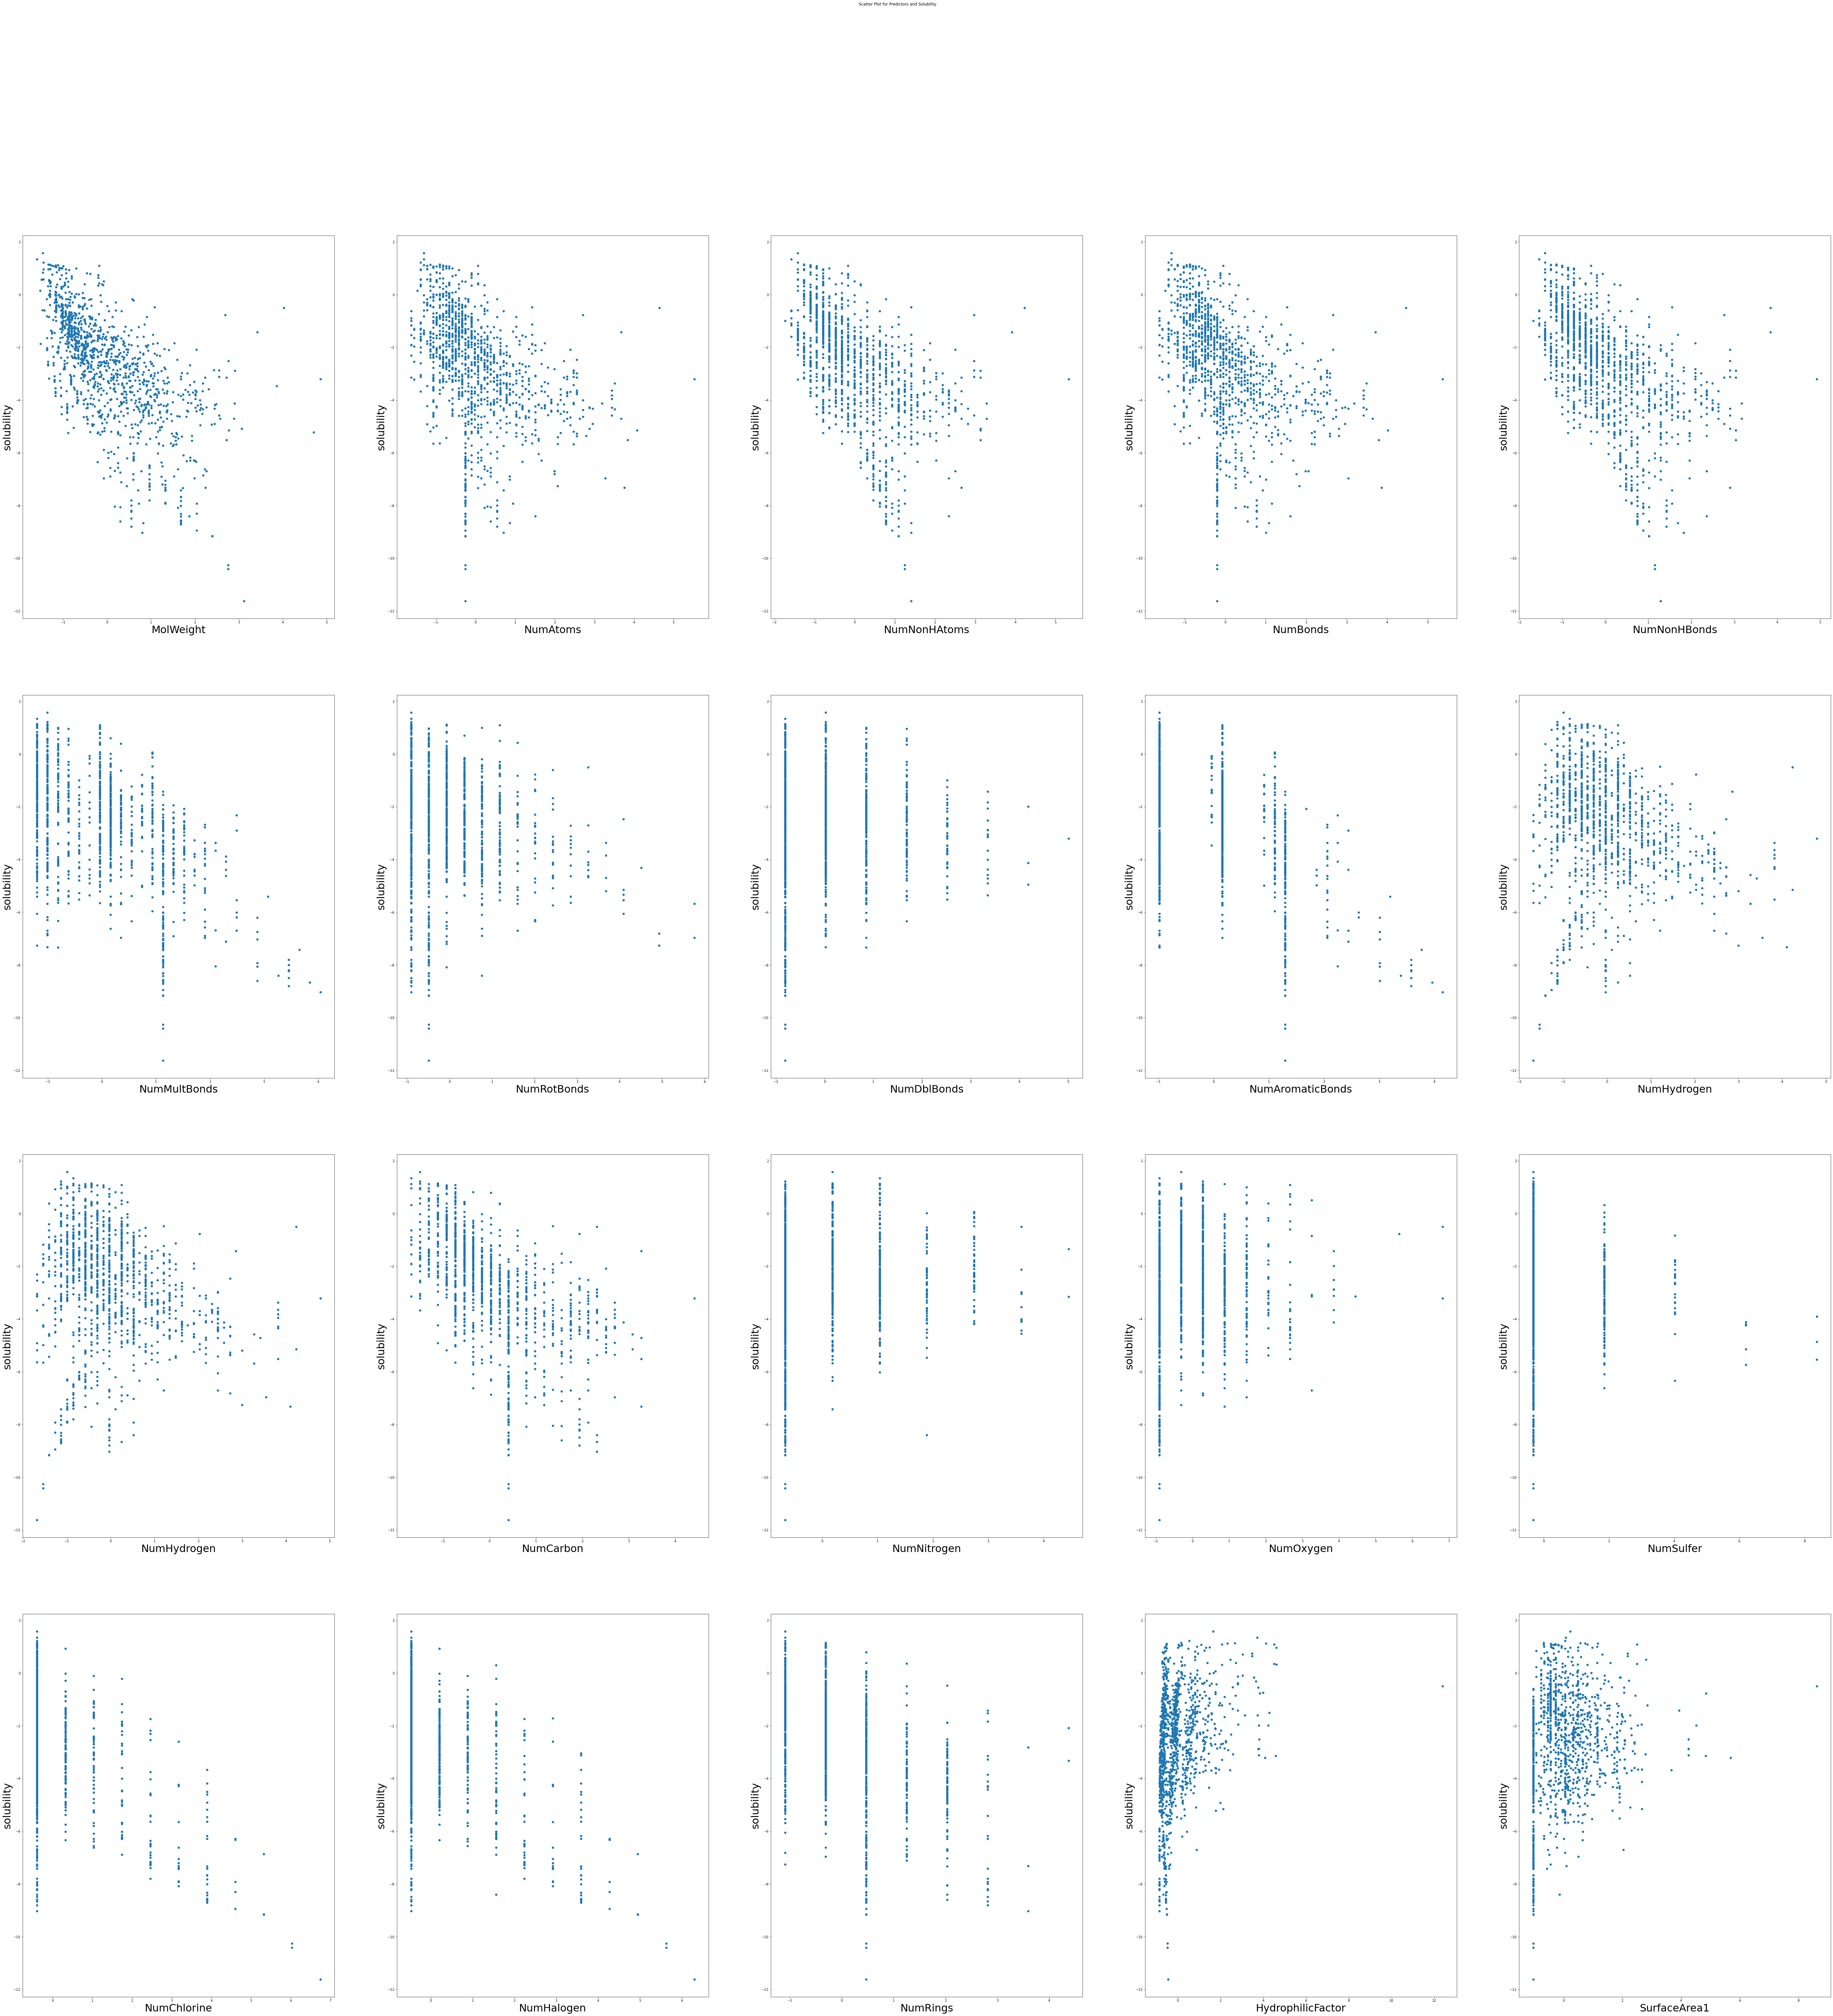

In [10]:
labels = df.columns
nrows, ncols = 4, 5
fig3, axes3 = plt.subplots(nrows, ncols, figsize = (100,100))

for i in range(nrows): 
    for j in range(ncols): 
        ax = axes3[i]
        # We are looking for a linear relationship between predictors and target
        if i==0:
            ax[j].scatter(df[labels[j]], Y)
            ax[j].set_xlabel(df.columns[j], fontsize = 32)
            ax[j].set_ylabel('solubility', fontsize = 32)
        elif i==1:
            ax[j].scatter(df[labels[j+5]], Y)
            ax[j].set_xlabel(df.columns[j+5], fontsize = 32)
            ax[j].set_ylabel('solubility', fontsize = 32)
        elif i==2:
            ax[j].scatter(df[labels[j+9]], Y)
            ax[j].set_xlabel(df.columns[j+9], fontsize = 32)
            ax[j].set_ylabel('solubility', fontsize = 32)
        else:
            ax[j].scatter(df[labels[j+14]], Y)    
            ax[j].set_xlabel(df.columns[j+14], fontsize = 32)
            ax[j].set_ylabel('solubility', fontsize = 32)
            
fig3.suptitle('Scatter Plot for Predictors and Solubility')        
plt.show()

In [11]:
X =  df.iloc[:, 0:20]# Features 
y = df['solubility'] # Target

In [12]:
# Split data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [13]:
print("Predictor Mean: \n{}\n".format(df.mean(axis = 0).to_dict()))
print("Predictor Standard Deviation: \n{}\n".format(df.std(axis = 0).to_dict()))
print("Predictor Skewness: \n{}\n".format(df.skew(axis = 0).to_dict()))

Predictor Mean: 
{'MolWeight': 1.8822092003905575e-16, 'NumAtoms': 1.8822092003905575e-16, 'NumNonHAtoms': -3.7398830853197857e-16, 'NumBonds': 2.9267126300300103e-16, 'NumNonHBonds': 1.9680828045052105e-16, 'NumMultBonds': 1.7792485015796215e-16, 'NumRotBonds': 3.1124800185229327e-16, 'NumDblBonds': -4.640679667257166e-16, 'NumAromaticBonds': 1.9389909304582053e-15, 'NumHydrogen': 1.5667551444591791e-16, 'NumCarbon': 3.0493892073366574e-17, 'NumNitrogen': -1.770047758281623e-16, 'NumOxygen': 1.5597450543273707e-16, 'NumSulfer': 1.1813754394630118e-15, 'NumChlorine': -5.645751339905196e-16, 'NumHalogen': -2.6106451912120986e-15, 'NumRings': 9.84742411265786e-16, 'HydrophilicFactor': 5.238289850993832e-16, 'SurfaceArea1': -4.118427952437439e-17, 'SurfaceArea2': 2.1030270395425222e-17, 'solubility': 2.322092356161535e-16}

Predictor Standard Deviation: 
{'MolWeight': 1.0003948667478664, 'NumAtoms': 1.0003948667478693, 'NumNonHAtoms': 1.000394866747866, 'NumBonds': 1.0003948667478673, 'Nu

In [14]:
print('Train/Test split proportion: ')
print(f'Train predictors w.r.t dataset: {np.round(len(X_train.axes[0])/len(df.axes[0])*100):.2f}%.')
print(f'Test predictors w.r.t dataset:  {np.round(len(X_test.axes[0])/len(df.axes[0])*100):.2f}%.')

Train/Test split proportion: 
Train predictors w.r.t dataset: 75.00%.
Test predictors w.r.t dataset:  25.00%.


In [15]:
###### Linear Regression #######
# Create a regression model 
model = linear_model.LinearRegression()

# Fit model in training data 
model.fit(X_train, y_train)

# Compute the predicted target from the model given input X_test
y_pred = model.predict(X_test) # y = beta0 + beta1*X_1

In [16]:
e = np.array(y_test - y_pred) # Residuals
print(f'Residuals:\n{e}\n')
RSS = np.sum(e**2) # Root Square Sum of residuals
print(f'RSS = {RSS:.3f}')

Residuals:
[ 5.50436277e-01 -3.60767095e-02  1.43292315e-01  1.97512830e-01
 -7.23515139e-01 -3.51789049e-01  5.32661724e-01 -5.53022665e-02
 -3.64649469e-01  2.04475269e-01 -3.47761685e-01 -6.90323938e-01
 -1.19157260e+00 -1.63760121e-01  2.03311471e-01  3.75419835e-01
  3.04588545e-01  9.21330167e-01  2.98526536e-02  1.90213996e-01
 -2.67033077e-01 -3.30254527e-01  7.77101853e-01  3.45376359e-01
 -8.80002307e-02 -9.86793107e-02 -8.80728995e-01  4.59928430e-01
  6.36838601e-01  2.60091126e-01 -2.80639579e-01  1.58775759e-01
  2.48447905e-01  2.81192193e-02  3.92309602e-01 -1.35397866e-01
 -4.64543562e-01  7.70021690e-01  1.08937160e+00 -1.11722121e+00
 -1.88601418e-01  5.04270509e-01 -1.23446190e-01 -5.51120903e-01
  1.58402408e-01 -8.80361701e-01 -1.20702241e-01 -2.12030999e-01
 -3.73278659e-01 -5.03294641e-01 -4.86248885e-01  5.99200526e-01
  6.01157775e-01  6.31509464e-02 -3.75546060e-01  5.77990637e-01
  8.67762602e-03  1.82452737e-01  4.07455426e-01  1.12898658e+00
 -1.54908515e-

In [17]:
# The coefficients
roundedCoeff = np.round(model.coef_, decimals = 3)
# Build a dataframe containing the features and their respectives coefficients
coef = pd.DataFrame(roundedCoeff, columns=['Coefficients'], index=X_train.columns)
coef

,Coefficients
MolWeight,-0.400
NumAtoms,0.017
NumNonHAtoms,1.293
NumBonds,-0.031
NumNonHBonds,1.026
NumMultBonds,-3.643
NumRotBonds,-0.118
NumDblBonds,0.342
NumAromaticBonds,2.709
NumHydrogen,-1.106


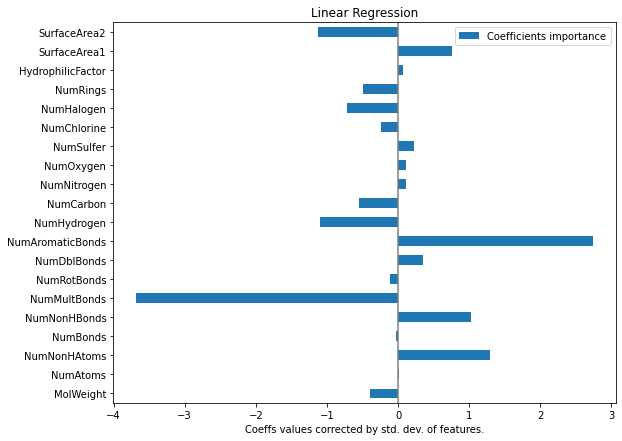

In [18]:
coef_scaled = pd.DataFrame(roundedCoeff*X_train.std(axis=0), columns = ['Coefficients importance'], index = X.columns[:])
coef_scaled.plot(kind = 'barh', figsize=(9,7))
plt.title('Linear Regression')
plt.xlabel('Coeffs values corrected by std. dev. of features.')
plt.axvline(x = 0, color = '.5')

In [19]:
# The mean squared error
print(f'\nIntercept: {model.intercept_:.3f}.')
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
MSE = mean_squared_error(y_test, y_pred)
#diff = (Y_test-Y_pred)**2
#MSE_manual = np.sum(diff)/143
print(f"\nMean squared error (MSE)= {MSE:.3f}.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
RMSE = sqrt(MSE)
print(f"\nRoot Mean Squared Error (RMSE)= {RMSE:.3f}.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#print(f"\nMean squared error manual = {MSE_manual:.3f}.")
# The coefficient of determination: 1 is perfect prediction
R2Score = r2_score(y_test, y_pred)
print(f"\nCoefficient of determination (R2): {R2Score:.3f}. Thus, the model can represent ~ {np.round(R2Score, decimals = 2)*100}% of the variation in the outcome.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#  This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.
print("\nExplain variance score =", np.round(explained_variance_score(y_test, y_pred), 2))
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#### The best case is to obtain Low RMSE and High R^2 ####


Intercept: -0.005.
----------------------------------------------------------------------------------------------------------------------------------------

Mean squared error (MSE)= 0.193.
----------------------------------------------------------------------------------------------------------------------------------------

Root Mean Squared Error (RMSE)= 0.439.
----------------------------------------------------------------------------------------------------------------------------------------

Coefficient of determination (R2): 0.810. Thus, the model can represent ~ 81.0% of the variation in the outcome.
----------------------------------------------------------------------------------------------------------------------------------------

Explain variance score = 0.81
----------------------------------------------------------------------------------------------------------------------------------------


In [20]:
N_predictors = len(X_test.axes[1])

# Arrays to store the coefficients
m = np.zeros((N_predictors)) # slope of line
b = np.zeros((N_predictors)) # intercept of line 

for i in range(N_predictors):
    # Fit a line in the data, using the predicted data to estimate the coefficients 
    m[i], b[i] = np.polyfit(X_test[X_test.columns[i]], y_pred, 1) # setting model parameters 

<ipython-input-33-48fbfacce09f>:23: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


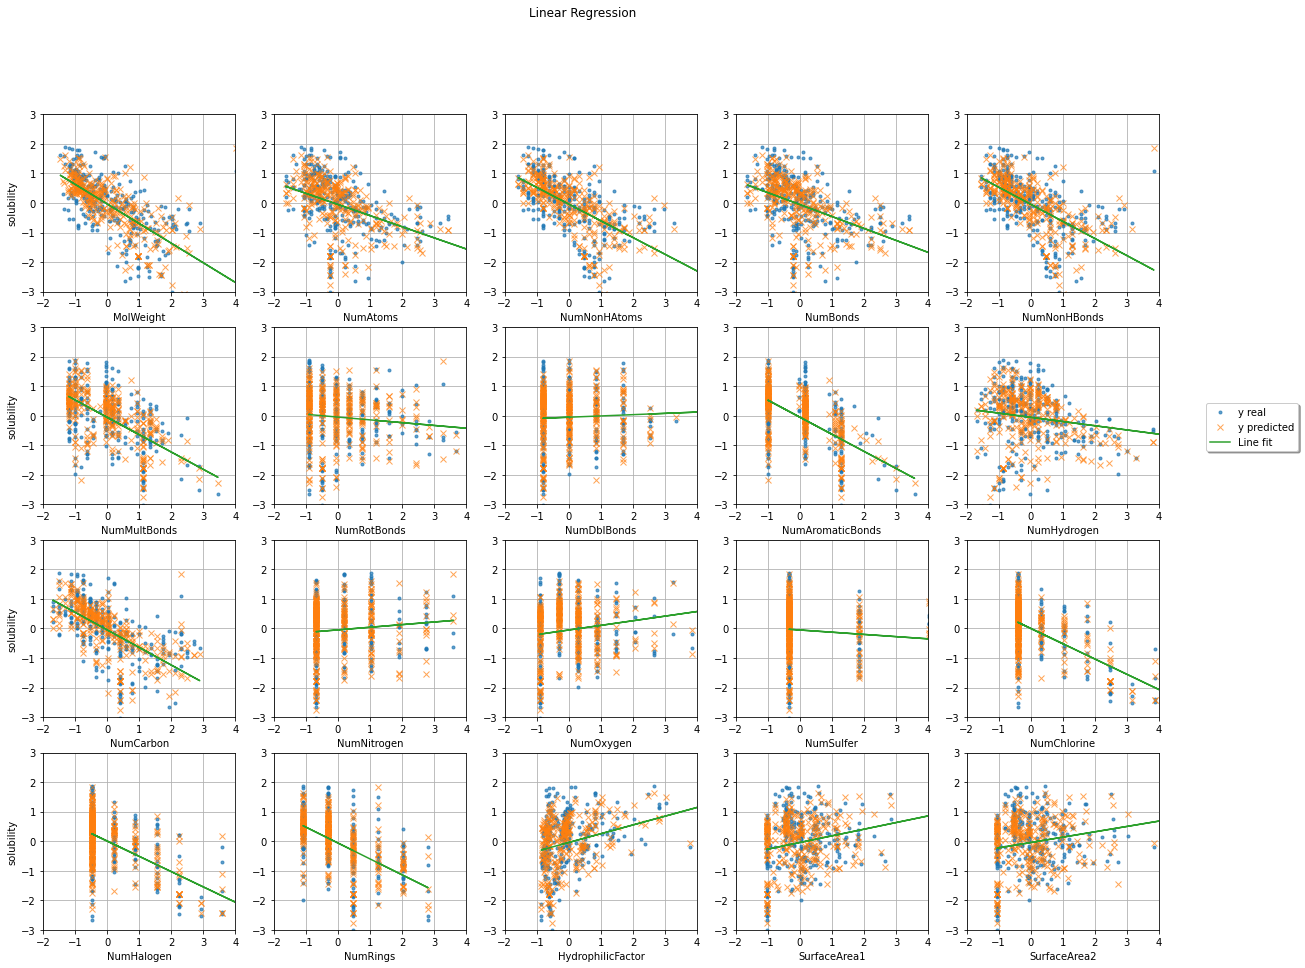

In [33]:
i = 0
bottom = -3
top = 3
nrow = 4
ncol = 5
fig3, axes3 = plt.subplots(nrow, ncol, figsize = (20, 15))
for row_i in range(nrow):
    for col_i in range(ncol):
        lineFit=m[i]*X_test[X_test.columns[i]]+b[i]
        ax3 = axes3[row_i]
        ax3[col_i].plot(X_test[X_test.columns[i]], y_test, '.', label = 'y real', alpha = .7)
        ax3[col_i].plot(X_test[X_test.columns[i]], y_pred, 'x', label = 'y predicted', alpha = .7)
        ax3[col_i].plot(X_test[X_test.columns[i]], lineFit, '-', label = 'Line fit')
        ax3[col_i].set_xlabel(X_test.columns[i])
        ax3[col_i].set_xlim(-2, 4)
        ax3[col_i].set_ylim(bottom, top)
        ax3[col_i].grid()
        i += 1
for row in range(nrow):
    axes3[row][0].set_ylabel('solubility')
fig3.suptitle('Linear Regression')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.75, 3), frameon = True, shadow = True)
plt.tight_layout()

plt.show()

## K-Fold Cross-Validation

In [22]:
scores5_R2 = cross_val_score(model, X, y, scoring ='r2', cv=5) # 5-Fold Cross-Validation R2 validation
print("\nFor 5-fold Cross-Validation with R2 scoring: ")
print(f"Accuracy: {scores5_R2.mean():.3f}\nStandard deviation: {scores5_R2.std():.3f}.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#### The best case is to obtain Low RMSE and High R^2 ####
scores10_R2 = cross_val_score(model, X, y, scoring ='r2', cv=10) # 10-Fold Cross-Validation R2 validation
print("\nFor 10-fold Cross-Validation with R2 scoring: ")
print(f"Accuracy: {scores10_R2.mean():.3f}\nStandard deviation: {scores10_R2.std():.3f}.")


For 5-fold Cross-Validation with R2 scoring: 
Accuracy: -0.328
Standard deviation: 1.123.
----------------------------------------------------------------------------------------------------------------------------------------

For 10-fold Cross-Validation with R2 scoring: 
Accuracy: -1.785
Standard deviation: 2.993.


In [23]:
# Initialize a set of candidates alphas (lambda parameter)
alphas = 10**np.linspace(10,-2,100)*0.5

# Create a Ridge Regression Model
ridge = Ridge()
# Create an empty list to store RMSEs for each candidate alpha 
rmseRidge = []
weights = []
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    weights.append(ridge.coef_)
    rmseRidge.append(sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

Lambda that minimizes the error: 0.005.


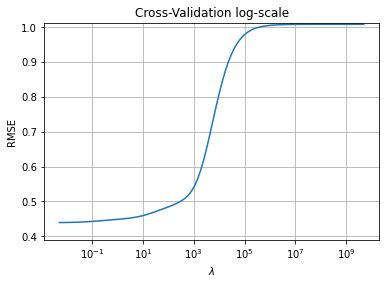

In [24]:
rmseRidge = np.array(rmseRidge) # convert list to array type 

# Setting inferior and superior limits of plot 
inf_lim = np.min(rmseRidge)-0.05 
sup_lim = np.max(rmseRidge)+0.005
ax = plt.gca()
ax.plot(alphas, rmseRidge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('$\lambda$')
plt.ylim(inf_lim, sup_lim)
plt.ylabel('RMSE')
plt.title('Cross-Validation log-scale')
plt.grid()


print(f'Lambda that minimizes the error: {ridge.alpha}.')

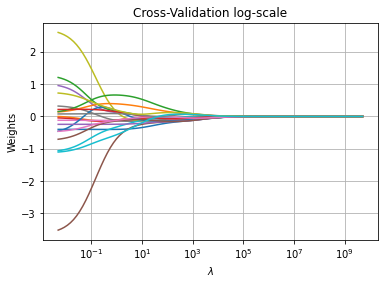

In [25]:

ax = plt.gca()
ax.plot(alphas, weights)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('$\lambda$')
#plt.ylim(inf_lim, sup_lim)
plt.ylabel('Weights')
plt.title('Cross-Validation log-scale')
plt.grid()

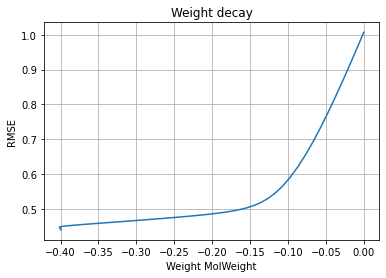

In [26]:
weights = np.array(weights)

ax = plt.gca()
ax.plot(weights[:,0], rmseRidge)

plt.axis('tight')
plt.xlabel('Weight MolWeight')
#plt.ylim(inf_lim, sup_lim)
plt.ylabel('RMSE')
plt.title('Weight decay')
plt.grid()

In [27]:
###### Ridge Linear Regression #######
# Fit model in training data 
ridge.fit(X_train, y_train)

# Compute the predicted target from the model given input X_test
y_pred_ridge = model.predict(X_test) # y = beta0 + beta1*X_1

In [28]:
# The mean squared error
print('**************** RIDGE LINEAR REGRESSION **************** ')
print(f'\nIntercept: {ridge.intercept_:.3f}.')
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
ridge_MSE = mean_squared_error(y_test, y_pred_ridge)
print(f"\nMean squared error (MSE)= {ridge_MSE:.3f}.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
ridge_RMSE = sqrt(MSE)
print(f"\nRoot Mean Squared Error (RMSE)= {ridge_RMSE:.3f}.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#print(f"\nMean squared error manual = {MSE_manual:.3f}.")
# The coefficient of determination: 1 is perfect prediction
ridge_R2Score = r2_score(y_test, y_pred_ridge)
print(f"\nCoefficient of determination (R2): {ridge_R2Score:.3f}. Thus, the model can represent ~ {np.round(ridge_R2Score, decimals = 2)*100}% of the variation in the outcome.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#  This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.
print("\nExplain variance score =", np.round(explained_variance_score(y_test, y_pred_ridge), 2))
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#### The best case is to obtain Low RMSE and High R^2 ####

**************** RIDGE LINEAR REGRESSION **************** 

Intercept: -0.005.
----------------------------------------------------------------------------------------------------------------------------------------

Mean squared error (MSE)= 0.193.
----------------------------------------------------------------------------------------------------------------------------------------

Root Mean Squared Error (RMSE)= 0.439.
----------------------------------------------------------------------------------------------------------------------------------------

Coefficient of determination (R2): 0.810. Thus, the model can represent ~ 81.0% of the variation in the outcome.
----------------------------------------------------------------------------------------------------------------------------------------

Explain variance score = 0.81
----------------------------------------------------------------------------------------------------------------------------------------


## PCR

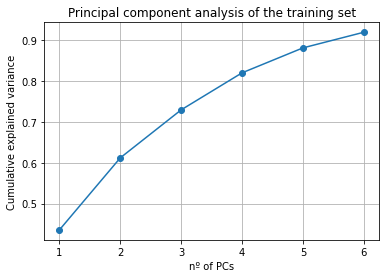

In [46]:
# Principal component analysis of the training set:
pca = PCA(n_components=6) 
pca.fit(X_train)
plt.figure()
plt.title('Principal component analysis of the training set')
plt.xlabel('nº of PCs')
plt.ylabel('Cumulative explained variance')
plt.plot(np.arange(6)+1, np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.grid()
plt.show()

In [55]:
# Principal-component regression: # PC = 2
pca = PCA(n_components=2) # PCA components
# Transforming the training set:
pc_train = pca.fit_transform(X_train)
# Create a new linear regression model:
pcr = linear_model.LinearRegression()

# We now use the Principal Components as training set
pcr.fit(pc_train, y_train)
y_pred_pcr = pcr.predict(pca.fit_transform(X_test))

# Compute the RMSE and the R2 scores using scikit-learn built-in functions
mse_pcr = mean_squared_error(y_test, y_pred_pcr)
rmse_pcr = np.sqrt(mean_squared_error(y_test, y_pred_pcr))
r2_pcr = r2_score(y_test,y_pred_pcr)

pcr_coeff = pcr.coef_

In [56]:
# The mean squared error
print(f'*********** PCR ***********')
print(f'\nIntercept: {pcr.intercept_:.3f}.')
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
print(f'\nCoefficients: \n[{pcr_coeff}].')
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
print(f"\nMean squared error (MSE)= {mse_pcr:.3f}.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
print(f"\nRoot Mean Squared Error (RMSE)= {rmse_pcr:.3f}.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#print(f"\nMean squared error manual = {MSE_manual:.3f}.")
# The coefficient of determination: 1 is perfect prediction
print(f"\nCoefficient of determination (R2): {r2_pcr:.3f}. Thus, the model can represent ~ {np.round(r2_pcr, decimals = 2)*100}% of the variation in the outcome.")
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#  This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.
print("\nExplain variance score =", np.round(explained_variance_score(y_test, y_pred_pcr), 2))
print(f'----------------------------------------------------------------------------------------------------------------------------------------')
#### The best case is to obtain Low RMSE and High R^2 ####

*********** PCR ***********

Intercept: 0.010.
----------------------------------------------------------------------------------------------------------------------------------------

Coefficients: 
[[-0.13289434 -0.37796014]].
----------------------------------------------------------------------------------------------------------------------------------------

Mean squared error (MSE)= 2.615.
----------------------------------------------------------------------------------------------------------------------------------------

Root Mean Squared Error (RMSE)= 1.617.
----------------------------------------------------------------------------------------------------------------------------------------

Coefficient of determination (R2): -1.581. Thus, the model can represent ~ -158.0% of the variation in the outcome.
----------------------------------------------------------------------------------------------------------------------------------------

Explain variance score = -1.58
